# GroupBy II

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### Use Case: statistics on Occupations. 

In [89]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')
users.head(200)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
196,49,M,writer,55105
197,55,M,technician,75094
198,21,F,student,55414


### Get the mean age per occupation

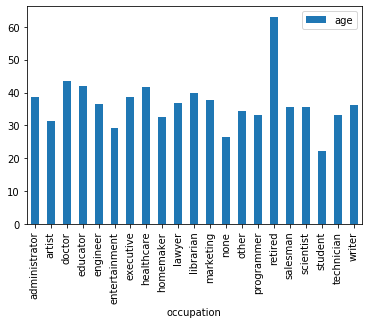

In [4]:
users1 = users.groupby(['occupation'], group_keys=False).mean()
users1
users1.plot.bar()

### Get the Male ratio per occupation and sort it from the most to the least

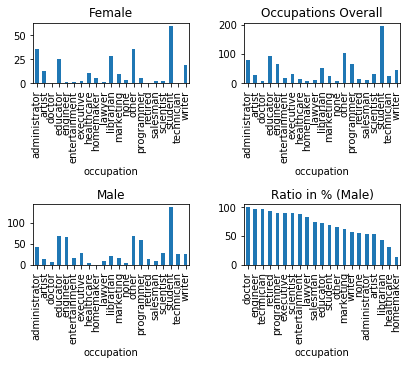

In [65]:
occupations = users.groupby(['occupation'] )['occupation'].count()
female = users.groupby(['occupation'] )['gender'].apply(lambda x: x[x == 'F'].count())
male = users.groupby(['occupation'] )['gender'].apply(lambda x: x[x == 'M'].count())
ratio = male/(female+male)*100

ratio = ratio.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=2.0,
                    wspace=0.35)
female.plot.bar(ax=axes[0,0], title='Female')
male.plot.bar(ax=axes[1,0], title='Male')
occupations.plot.bar(ax=axes[0,1], title='Occupations Overall')
ratio.plot.bar(ax=axes[1,1], title='Ratio in % (Male)')

### For each occupation, calculate the minimum and maximum ages

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

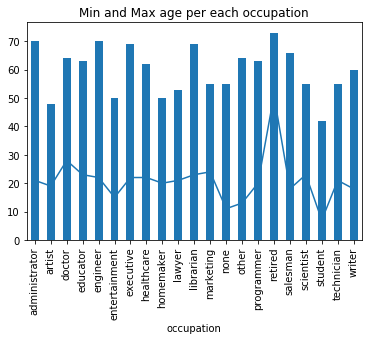

In [58]:
age_max = users.groupby(['occupation'] )['age'].max()
age_min = users.groupby(['occupation'] )['age'].min()
ax = age_max.plot.bar(title='Min and Max age per each occupation')
age_min.plot(ax=ax)
plt.xticks(rotation=90)

### For each combination of occupation and gender, calculate the mean age

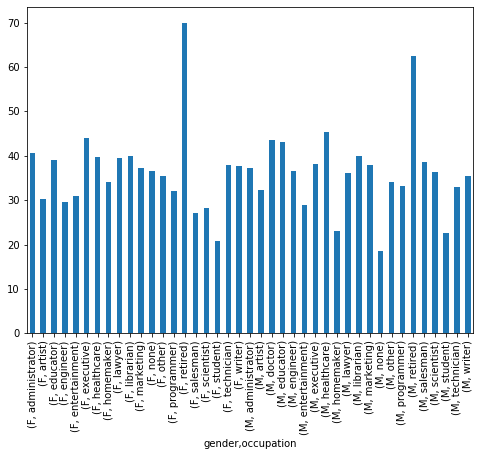

In [61]:
users.groupby(['gender', 'occupation'] )['age'].mean().plot.bar(figsize=(8, 6));

### [dificult] For each occupation present the percentage of women and men

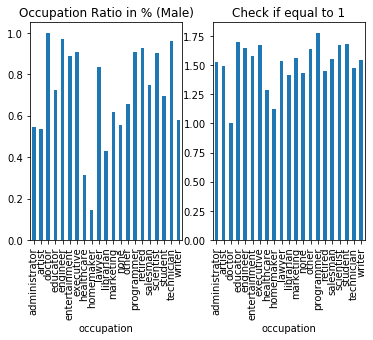

In [92]:
female = users.groupby(['occupation'] )['gender'].apply(lambda x: x[x == 'F'].count())
male = users.groupby(['occupation'] )['gender'].apply(lambda x: x[x == 'M'].count())

male = male/(male+female)
female = female/(male+female)

fig, axes = plt.subplots(nrows=1, ncols=2)
male.plot.bar(ax=axes[0], title='Occupation Ratio in % (Male)')
#female.plot.bar(ax=axes[1], title='Occupation Ratio in % (Female)')

#Checksum - should be equal to 1 ?!
test = male + female 
test.plot.bar(ax=axes[1], title='Check if equal to 1')




In [88]:
users.gender.unique()

array(['M', 'F'], dtype=object)